In [39]:
import pandas as pd
# import sys
import matplotlib.pyplot as plt

In [40]:
# sys.path.append("C:/Users/44756/Documents/Postgrad/DSA8030/Data/")

In [41]:
# Refined data from initial.ipynb
sold_valdate = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_valdate.csv", dtype = {'brokered_by':'string', 'street':'string', 'zip_code':'string'}, parse_dates = [11])

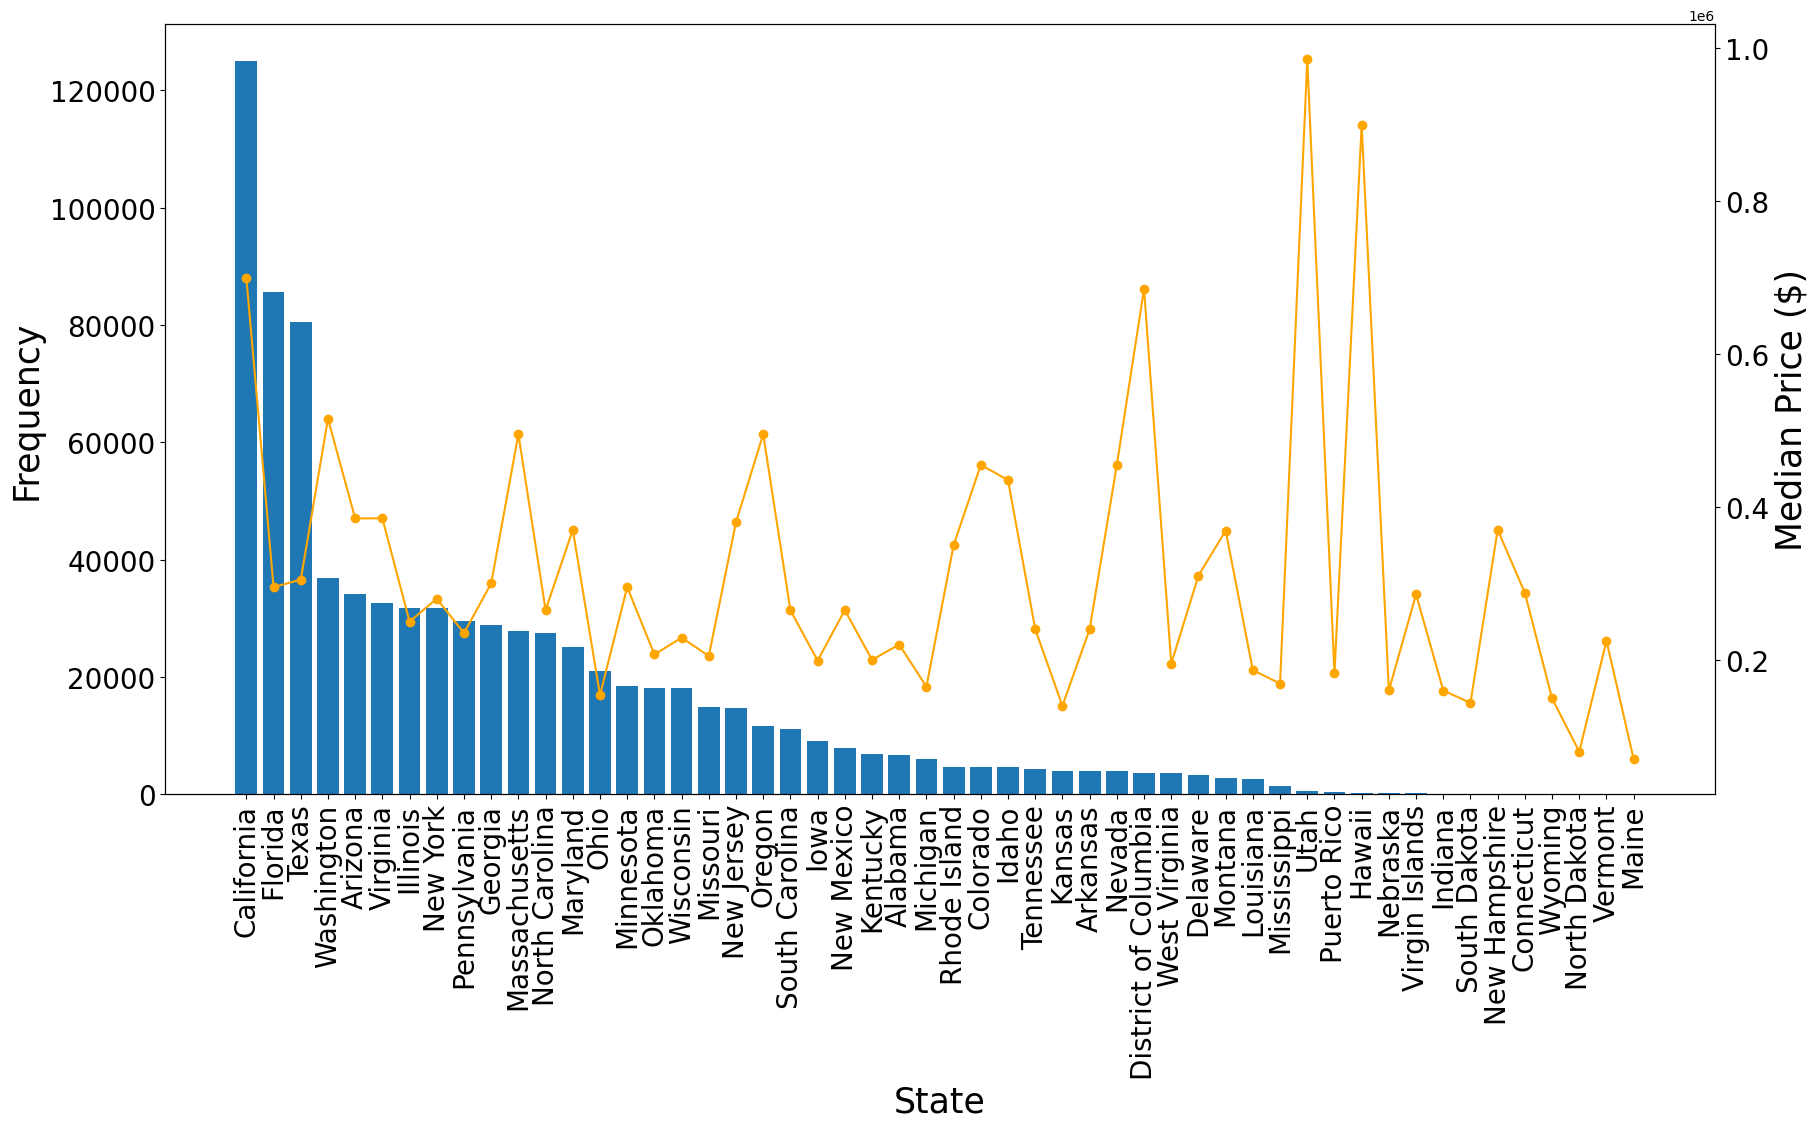

In [42]:
fig, ax = plt.subplots(figsize=(20,10))

states = sold_valdate.groupby('state').describe()['price'].sort_values(by = 'count', ascending = False).index.tolist()
freq = [len(sold_valdate[sold_valdate['state'] == st]) for st in states]
prices = [sold_valdate[sold_valdate.state == st].price.median() for st in states]

ax.bar(states, freq)
ax.tick_params(axis='both', labelsize = '20')
ax.set_xlabel('State', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
plt.xticks(rotation = 90)
ax2 = ax.twinx()
ax2.tick_params(axis='both', labelsize = '20')
ax2.plot(states, prices, color = 'orange')
ax2.scatter(states, prices, color = 'orange')
ax2.set_ylabel('Median Price ($)', fontsize = 25)
plt.show()

In [43]:
# "US Zip Codes Demographics" dataset
demo_data = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/zip_code_demographics.csv", dtype = {'zip':'string'})

In [44]:
# Climate data from various sources laid out in README.md

# Mainland US, 2020
tempus2020 = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/2020avgtemp.csv", usecols = [1,2,3])
precipus2020 = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/2020precip.csv", usecols = [1,2,3])
maxtempus2020 = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/2020maxtemp.csv", usecols = [1,2,3])
mintempus2020 = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/2020mintemp.csv", usecols = [1,2,3])

# Mainland US, 2021
tempus2021 = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/2021avgtemp.csv", usecols = [1,2,3])
precipus2021 = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/2020precip.csv", usecols = [1,2,3])
maxtempus2021 = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/2021maxtemp.csv", usecols = [1,2,3])
mintempus2021 = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/2021mintemp.csv", usecols = [1,2,3])

# Puerto Rico
temppr = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/PRavgtemp.csv", usecols = [1,2,3])
precippr = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/PRprecip.csv", usecols = [1,2,3])
maxtemppr = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/PRmaxtemp.csv", usecols = [1,2,3])
mintemppr = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/PRmintemp.csv", usecols = [1,2,3])

# U.S. Virgin Islands
tempvi = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/VIavgtemp.csv", usecols = [1,2,3])
precipvi = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/VIprecip.csv", usecols = [1,2,3])
maxtempvi = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/VImaxtemp.csv", usecols = [1,2,3])
mintempvi = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/VImintemp.csv", usecols = [1,2,3])

In [45]:
# Crosswalk datasets
crosswalk = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/crosswalk.csv", usecols = [0,1,2], dtype = {'ZIP':'string'})
crosswalkpr = pd.read_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/PRcrosswalk.csv")

In [46]:
# Merging sold houses with crosswalk dataset
sold_cw = pd.merge(sold_valdate, crosswalk, left_on = 'zip_code', right_on = 'ZIP')
sold_cw = sold_cw.drop(axis = 1, labels = ['status', 'ZIP'])
sold_cw

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,COUNTYNAME,STATEFULL
0,62066.0,77500.0,3.0,1.0,NaN,1072625.0,Ponce,Puerto Rico,00717,957.0,2021-01-29 00:11:00,Ponce Municipio,Puerto Rico
1,72457.0,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,00602,2200.0,2021-01-13 00:12:00,Aguada Municipio,Puerto Rico
2,48586.0,175000.0,NaN,NaN,0.14,1139965.0,Aguadilla,Puerto Rico,00603,3200.0,2021-01-29 00:11:00,Aguadilla Municipio,Puerto Rico
3,61711.0,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,00603,1421.0,2021-01-19 00:10:00,Aguadilla Municipio,Puerto Rico
4,49592.0,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,00610,850.0,2021-01-30 00:12:00,Anasco Municipio,Puerto Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811245,23009.0,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-01-25 00:03:00,Benton County,Washington
811246,18208.0,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-01-25 00:03:00,Benton County,Washington
811247,76856.0,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-01-24 00:03:00,Benton County,Washington
811248,53618.0,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-01-24 00:03:00,Benton County,Washington


In [47]:
# Filtering to mainland US properties
sold_cw_us = sold_cw[(sold_cw.state != 'Puerto Rico') & (sold_cw.state != 'Virgin Islands')]
sold_cw_us

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,COUNTYNAME,STATEFULL
607,53016.0,215000.0,2.0,2.0,NaN,597574.0,Agawam,Massachusetts,01001,1136.0,2022-01-11 00:04:00,Hampden County,Massachusetts
608,8147.0,232900.0,2.0,2.0,NaN,1138393.0,Agawam,Massachusetts,01001,1428.0,2022-01-11 00:04:00,Hampden County,Massachusetts
609,48733.0,975000.0,3.0,4.0,3.04,431222.0,Amherst,Massachusetts,01002,2074.0,2022-01-15 00:04:00,Franklin County,Massachusetts
610,48733.0,649900.0,4.0,3.0,0.48,1122145.0,Amherst,Massachusetts,01002,2650.0,2022-01-14 00:04:00,Franklin County,Massachusetts
611,79067.0,215000.0,3.0,2.0,0.19,697261.0,Chicopee,Massachusetts,01020,1828.0,2022-01-15 00:04:00,Hampden County,Massachusetts
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811245,23009.0,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-01-25 00:03:00,Benton County,Washington
811246,18208.0,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-01-25 00:03:00,Benton County,Washington
811247,76856.0,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-01-24 00:03:00,Benton County,Washington
811248,53618.0,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-01-24 00:03:00,Benton County,Washington


In [48]:
# Splitting mainland US properties into the two years of sale
sold_cw_us_21 = sold_cw_us[(sold_cw_us.prev_sold_date >= '2021-01-01') & (sold_cw_us.prev_sold_date <= '2021-12-31') ]
sold_cw_us_22 = sold_cw_us[(sold_cw_us.prev_sold_date >= '2022-01-01') & (sold_cw_us.prev_sold_date <= '2022-12-31') ]

In [49]:
# Mainland US merging

# Average temperature
sold_cw_us_21_clim = pd.merge(sold_cw_us_21, tempus2020, how = 'inner', left_on = [sold_cw_us_21['COUNTYNAME'].str.lower(), sold_cw_us_21['STATEFULL'].str.lower()], right_on = [tempus2020['Name'].str.lower(), tempus2020['State'].str.lower()])
sold_cw_us_22_clim = pd.merge(sold_cw_us_22, tempus2021, how = 'inner', left_on = [sold_cw_us_22['COUNTYNAME'].str.lower(), sold_cw_us_22['STATEFULL'].str.lower()], right_on = [tempus2021['Name'].str.lower(), tempus2021['State'].str.lower()])
sold_cw_us_21_clim = sold_cw_us_21_clim.rename(columns = {'Value':'avgtemp'})
sold_cw_us_22_clim = sold_cw_us_22_clim.rename(columns = {'Value':'avgtemp'})
sold_cw_us_21_clim = sold_cw_us_21_clim.drop(columns = ['key_0', 'key_1', 'Name', 'State'])
sold_cw_us_22_clim = sold_cw_us_22_clim.drop(columns = ['key_0', 'key_1', 'Name', 'State'])

# Precipitation
sold_cw_us_21_clim = pd.merge(sold_cw_us_21_clim, precipus2020, how = 'inner', left_on = [sold_cw_us_21_clim['COUNTYNAME'].str.lower(), sold_cw_us_21_clim['STATEFULL'].str.lower()], right_on = [precipus2020['Name'].str.lower(), precipus2020['State'].str.lower()])
sold_cw_us_22_clim = pd.merge(sold_cw_us_22_clim, precipus2021, how = 'inner', left_on = [sold_cw_us_22_clim['COUNTYNAME'].str.lower(), sold_cw_us_22_clim['STATEFULL'].str.lower()], right_on = [precipus2021['Name'].str.lower(), precipus2021['State'].str.lower()])
sold_cw_us_21_clim = sold_cw_us_21_clim.rename(columns = {'Value':'precipitation'})
sold_cw_us_22_clim = sold_cw_us_22_clim.rename(columns = {'Value':'precipitation'})
sold_cw_us_21_clim = sold_cw_us_21_clim.drop(columns = ['key_0', 'key_1', 'Name', 'State'])
sold_cw_us_22_clim = sold_cw_us_22_clim.drop(columns = ['key_0', 'key_1', 'Name', 'State'])

# Maximum temperature
sold_cw_us_21_clim = pd.merge(sold_cw_us_21_clim, maxtempus2020, how = 'inner', left_on = [sold_cw_us_21_clim['COUNTYNAME'].str.lower(), sold_cw_us_21_clim['STATEFULL'].str.lower()], right_on = [maxtempus2020['Name'].str.lower(), maxtempus2020['State'].str.lower()])
sold_cw_us_22_clim = pd.merge(sold_cw_us_22_clim, maxtempus2021, how = 'inner', left_on = [sold_cw_us_22_clim['COUNTYNAME'].str.lower(), sold_cw_us_22_clim['STATEFULL'].str.lower()], right_on = [maxtempus2021['Name'].str.lower(), maxtempus2021['State'].str.lower()])
sold_cw_us_21_clim = sold_cw_us_21_clim.rename(columns = {'Value':'maxtemp'})
sold_cw_us_22_clim = sold_cw_us_22_clim.rename(columns = {'Value':'maxtemp'})
sold_cw_us_21_clim = sold_cw_us_21_clim.drop(columns = ['key_0', 'key_1', 'Name', 'State'])
sold_cw_us_22_clim = sold_cw_us_22_clim.drop(columns = ['key_0', 'key_1', 'Name', 'State'])

# Minimum temperature
sold_cw_us_21_clim = pd.merge(sold_cw_us_21_clim, mintempus2020, how = 'inner', left_on = [sold_cw_us_21_clim['COUNTYNAME'].str.lower(), sold_cw_us_21_clim['STATEFULL'].str.lower()], right_on = [mintempus2020['Name'].str.lower(), mintempus2020['State'].str.lower()])
sold_cw_us_22_clim = pd.merge(sold_cw_us_22_clim, mintempus2021, how = 'inner', left_on = [sold_cw_us_22_clim['COUNTYNAME'].str.lower(), sold_cw_us_22_clim['STATEFULL'].str.lower()], right_on = [mintempus2021['Name'].str.lower(), mintempus2021['State'].str.lower()])
sold_cw_us_21_clim = sold_cw_us_21_clim.rename(columns = {'Value':'mintemp'})
sold_cw_us_22_clim = sold_cw_us_22_clim.rename(columns = {'Value':'mintemp'})
sold_cw_us_21_clim = sold_cw_us_21_clim.drop(columns = ['key_0', 'key_1', 'Name', 'State', 'STATEFULL'])
sold_cw_us_22_clim = sold_cw_us_22_clim.drop(columns = ['key_0', 'key_1', 'Name', 'State', 'STATEFULL'])

# Both years merged
sold_cw_us_clim = pd.concat([sold_cw_us_21_clim, sold_cw_us_22_clim])
sold_cw_us_clim

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,COUNTYNAME,avgtemp,precipitation,maxtemp,mintemp
0,8147.0,150000.0,NaN,NaN,40.51,1963892.0,Blandford,Massachusetts,01008,NaN,2021-01-14 00:12:00,Berkshire County,48.0,40.44,58.0,37.9
1,53016.0,285000.0,3.0,2.0,2.80,12355.0,Blandford,Massachusetts,01008,1248.0,2021-01-03 00:12:00,Berkshire County,48.0,40.44,58.0,37.9
2,53016.0,235000.0,3.0,2.0,0.96,1637754.0,Blandford,Massachusetts,01008,1220.0,2021-01-02 00:12:00,Berkshire County,48.0,40.44,58.0,37.9
3,71852.0,95000.0,NaN,NaN,12.00,1885253.0,Blandford,Massachusetts,01008,NaN,2021-01-04 00:11:00,Berkshire County,48.0,40.44,58.0,37.9
4,107912.0,539000.0,3.0,3.0,2.45,152107.0,Blandford,Massachusetts,01008,3158.0,2021-01-29 00:10:00,Berkshire County,48.0,40.44,58.0,37.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562141,23009.0,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-01-25 00:03:00,Benton County,54.7,6.41,66.2,43.1
562142,18208.0,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-01-25 00:03:00,Benton County,54.7,6.41,66.2,43.1
562143,76856.0,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-01-24 00:03:00,Benton County,54.7,6.41,66.2,43.1
562144,53618.0,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-01-24 00:03:00,Benton County,54.7,6.41,66.2,43.1


In [50]:
# Filter to Puerto Rican sold properties and merge PR crosswalk 
# Our data source splits Puerto Rico's municipalities into eight areas which I have hand sorted in the crosswalk file.
sold_cw_pr = sold_cw[sold_cw.state == 'Puerto Rico']
sold_cw_pr = pd.merge(sold_cw_pr, crosswalkpr, left_on = 'COUNTYNAME', right_on = 'Municipality')

In [51]:
# Split properties into the two years of sale.
sold_cw_pr_21 = sold_cw_pr[(sold_cw_pr.prev_sold_date >= '2021-01-01') & (sold_cw_pr.prev_sold_date <= '2021-12-31') ]
sold_cw_pr_22 = sold_cw_pr[(sold_cw_pr.prev_sold_date >= '2022-01-01') & (sold_cw_pr.prev_sold_date <= '2022-12-31') ]

In [52]:
# Puerto Rico merging

# Average temperature
sold_cw_pr_21_clim = pd.merge(sold_cw_pr_21, temppr, how = 'inner', left_on = 'ClimReg', right_on = 'name')
sold_cw_pr_22_clim = pd.merge(sold_cw_pr_22, temppr, how = 'inner', left_on = 'ClimReg', right_on = 'name')
sold_cw_pr_21_clim = sold_cw_pr_21_clim.drop(columns = ['2021'])
sold_cw_pr_21_clim = sold_cw_pr_21_clim.rename(columns = {'2020':'avgtemp'})
sold_cw_pr_22_clim = sold_cw_pr_22_clim.drop(columns = ['2020'])
sold_cw_pr_22_clim = sold_cw_pr_22_clim.rename(columns = {'2021':'avgtemp'})
sold_cw_pr_21_clim = sold_cw_pr_21_clim.drop(columns = ['STATEFULL', 'Municipality', 'name'])
sold_cw_pr_22_clim = sold_cw_pr_22_clim.drop(columns = ['STATEFULL', 'Municipality', 'name'])

# Precipitation
sold_cw_pr_21_clim = pd.merge(sold_cw_pr_21_clim, precippr, how = 'inner', left_on = 'ClimReg', right_on = 'name')
sold_cw_pr_22_clim = pd.merge(sold_cw_pr_22_clim, precippr, how = 'inner', left_on = 'ClimReg', right_on = 'name')
sold_cw_pr_21_clim = sold_cw_pr_21_clim.drop(columns = ['2021'])
sold_cw_pr_21_clim = sold_cw_pr_21_clim.rename(columns = {'2020':'precipitation'})
sold_cw_pr_22_clim = sold_cw_pr_22_clim.drop(columns = ['2020'])
sold_cw_pr_22_clim = sold_cw_pr_22_clim.rename(columns = {'2021':'precipitation'})
sold_cw_pr_21_clim = sold_cw_pr_21_clim.drop(columns = ['name'])
sold_cw_pr_22_clim = sold_cw_pr_22_clim.drop(columns = ['name'])

# Maximum temperature
sold_cw_pr_21_clim = pd.merge(sold_cw_pr_21_clim, maxtemppr, how = 'inner', left_on = 'ClimReg', right_on = 'name')
sold_cw_pr_22_clim = pd.merge(sold_cw_pr_22_clim, maxtemppr, how = 'inner', left_on = 'ClimReg', right_on = 'name')
sold_cw_pr_21_clim = sold_cw_pr_21_clim.drop(columns = ['2021'])
sold_cw_pr_21_clim = sold_cw_pr_21_clim.rename(columns = {'2020':'maxtemp'})
sold_cw_pr_22_clim = sold_cw_pr_22_clim.drop(columns = ['2020'])
sold_cw_pr_22_clim = sold_cw_pr_22_clim.rename(columns = {'2021':'maxtemp'})
sold_cw_pr_21_clim = sold_cw_pr_21_clim.drop(columns = ['name'])
sold_cw_pr_22_clim = sold_cw_pr_22_clim.drop(columns = ['name'])

# Minimum temperature
sold_cw_pr_21_clim = pd.merge(sold_cw_pr_21_clim, maxtemppr, how = 'inner', left_on = 'ClimReg', right_on = 'name')
sold_cw_pr_22_clim = pd.merge(sold_cw_pr_22_clim, maxtemppr, how = 'inner', left_on = 'ClimReg', right_on = 'name')
sold_cw_pr_21_clim = sold_cw_pr_21_clim.drop(columns = ['2021'])
sold_cw_pr_21_clim = sold_cw_pr_21_clim.rename(columns = {'2020':'mintemp'})
sold_cw_pr_22_clim = sold_cw_pr_22_clim.drop(columns = ['2020'])
sold_cw_pr_22_clim = sold_cw_pr_22_clim.rename(columns = {'2021':'mintemp'})
sold_cw_pr_21_clim = sold_cw_pr_21_clim.drop(columns = ['ClimReg', 'name'])
sold_cw_pr_22_clim = sold_cw_pr_22_clim.drop(columns = ['ClimReg', 'name'])

# Both years merged
sold_cw_pr_clim = pd.concat([sold_cw_pr_21_clim, sold_cw_pr_22_clim])
sold_cw_pr_clim

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,COUNTYNAME,avgtemp,precipitation,maxtemp,mintemp
0,62066.0,77500.0,3.0,1.0,NaN,1072625.0,Ponce,Puerto Rico,00717,957.0,2021-01-29 00:11:00,Ponce Municipio,77.000,75.326025,30.33,30.33
1,72457.0,524900.0,3.0,2.0,0.09,1850809.0,Aguada,Puerto Rico,00602,2200.0,2021-01-13 00:12:00,Aguada Municipio,77.432,80.255555,30.52,30.52
2,48586.0,175000.0,NaN,NaN,0.14,1139965.0,Aguadilla,Puerto Rico,00603,3200.0,2021-01-29 00:11:00,Aguadilla Municipio,77.432,80.255555,30.52,30.52
3,61711.0,90000.0,3.0,2.0,0.08,141421.0,Aguadilla,Puerto Rico,00603,1421.0,2021-01-19 00:10:00,Aguadilla Municipio,77.432,80.255555,30.52,30.52
4,49592.0,22500.0,2.0,1.0,0.32,1889894.0,Anasco,Puerto Rico,00610,850.0,2021-01-30 00:12:00,Anasco Municipio,77.432,80.255555,30.52,30.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,41709.0,175000.0,3.0,2.0,NaN,1750245.0,Carolina,Puerto Rico,00987,1321.0,2022-01-15 00:02:00,Carolina Municipio,77.054,71.690590,30.07,30.07
277,102922.0,144900.0,4.0,2.0,11.00,10757.0,Carolina,Puerto Rico,00987,1400.0,2022-01-14 00:02:00,Carolina Municipio,77.054,71.690590,30.07,30.07
278,29911.0,165000.0,3.0,2.0,0.02,1843751.0,Carolina,Puerto Rico,00987,3100.0,2022-01-14 00:01:00,Carolina Municipio,77.054,71.690590,30.07,30.07
279,29911.0,39000.0,3.0,1.0,0.02,1320010.0,Carolina,Puerto Rico,00987,505.0,2022-01-07 00:01:00,Carolina Municipio,77.054,71.690590,30.07,30.07


In [53]:
# Filter to Virgin Islands sold properties
sold_cw_vi = sold_cw[sold_cw.state == 'Virgin Islands']

In [54]:
# Split properties into the two years of sale.
sold_cw_vi_21 = sold_cw_vi[(sold_cw_vi.prev_sold_date >= '2021-01-01') & (sold_cw_vi.prev_sold_date <= '2021-12-31') ]
sold_cw_vi_22 = sold_cw_vi[(sold_cw_vi.prev_sold_date >= '2022-01-01') & (sold_cw_vi.prev_sold_date <= '2022-12-31') ]

In [55]:
# U.S. Virgin Islands merging

# Average temperature
sold_cw_vi_21_clim = pd.merge(sold_cw_vi_21, tempvi, how = 'inner', left_on = 'COUNTYNAME', right_on = 'name')
sold_cw_vi_22_clim = pd.merge(sold_cw_vi_22, tempvi, how = 'inner', left_on = 'COUNTYNAME', right_on = 'name')
sold_cw_vi_21_clim = sold_cw_vi_21_clim.drop(columns = ['2021'])
sold_cw_vi_21_clim = sold_cw_vi_21_clim.rename(columns = {'2020':'avgtemp'})
sold_cw_vi_22_clim = sold_cw_vi_22_clim.drop(columns = ['2020'])
sold_cw_vi_22_clim = sold_cw_vi_22_clim.rename(columns = {'2021':'avgtemp'})
sold_cw_vi_21_clim = sold_cw_vi_21_clim.drop(columns = ['STATEFULL', 'name'])
sold_cw_vi_22_clim = sold_cw_vi_22_clim.drop(columns = ['STATEFULL', 'name'])

# Precipitation
sold_cw_vi_21_clim = pd.merge(sold_cw_vi_21_clim, precipvi, how = 'inner', left_on = 'COUNTYNAME', right_on = 'name')
sold_cw_vi_22_clim = pd.merge(sold_cw_vi_22_clim, precipvi, how = 'inner', left_on = 'COUNTYNAME', right_on = 'name')
sold_cw_vi_21_clim = sold_cw_vi_21_clim.drop(columns = ['2021'])
sold_cw_vi_21_clim = sold_cw_vi_21_clim.rename(columns = {'2020':'precipitation'})
sold_cw_vi_22_clim = sold_cw_vi_22_clim.drop(columns = ['2020'])
sold_cw_vi_22_clim = sold_cw_vi_22_clim.rename(columns = {'2021':'precipitation'})
sold_cw_vi_21_clim = sold_cw_vi_21_clim.drop(columns = ['name'])
sold_cw_vi_22_clim = sold_cw_vi_22_clim.drop(columns = ['name'])

# Maximum temperature
sold_cw_vi_21_clim = pd.merge(sold_cw_vi_21_clim, maxtempvi, how = 'inner', left_on = 'COUNTYNAME', right_on = 'name')
sold_cw_vi_22_clim = pd.merge(sold_cw_vi_22_clim, maxtempvi, how = 'inner', left_on = 'COUNTYNAME', right_on = 'name')
sold_cw_vi_21_clim = sold_cw_vi_21_clim.drop(columns = ['2021'])
sold_cw_vi_21_clim = sold_cw_vi_21_clim.rename(columns = {'2020':'maxtemp'})
sold_cw_vi_22_clim = sold_cw_vi_22_clim.drop(columns = ['2020'])
sold_cw_vi_22_clim = sold_cw_vi_22_clim.rename(columns = {'2021':'maxtemp'})
sold_cw_vi_21_clim = sold_cw_vi_21_clim.drop(columns = ['name'])
sold_cw_vi_22_clim = sold_cw_vi_22_clim.drop(columns = ['name'])

# Minimum temperature
sold_cw_vi_21_clim = pd.merge(sold_cw_vi_21_clim, mintempvi, how = 'inner', left_on = 'COUNTYNAME', right_on = 'name')
sold_cw_vi_22_clim = pd.merge(sold_cw_vi_22_clim, mintempvi, how = 'inner', left_on = 'COUNTYNAME', right_on = 'name')
sold_cw_vi_21_clim = sold_cw_vi_21_clim.drop(columns = ['2021'])
sold_cw_vi_21_clim = sold_cw_vi_21_clim.rename(columns = {'2020':'mintemp'})
sold_cw_vi_22_clim = sold_cw_vi_22_clim.drop(columns = ['2020'])
sold_cw_vi_22_clim = sold_cw_vi_22_clim.rename(columns = {'2021':'mintemp'})
sold_cw_vi_21_clim = sold_cw_vi_21_clim.drop(columns = ['name'])
sold_cw_vi_22_clim = sold_cw_vi_22_clim.drop(columns = ['name'])

# Both years merged
sold_cw_vi_clim = pd.concat([sold_cw_vi_21_clim, sold_cw_vi_22_clim])
sold_cw_vi_clim


,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,COUNTYNAME,avgtemp,precipitation,maxtemp,mintemp
0,22968.0,275000.0,3.0,2.0,0.25,599695.0,Christiansted,Virgin Islands,00820,1058.0,2021-01-30 00:12:00,St. Croix Island,81.284,47.590577,32.4,22.4
1,22968.0,93000.0,NaN,1.0,NaN,1685878.0,Christiansted,Virgin Islands,00820,510.0,2021-01-17 00:12:00,St. Croix Island,81.284,47.590577,32.4,22.4
2,34543.0,875000.0,7.0,8.0,0.93,1142445.0,Christiansted,Virgin Islands,00820,14000.0,2021-01-16 00:12:00,St. Croix Island,81.284,47.590577,32.4,22.4
3,22968.0,274900.0,NaN,NaN,1.18,131049.0,Christiansted,Virgin Islands,00820,NaN,2021-01-09 00:12:00,St. Croix Island,81.284,47.590577,32.4,22.4
4,22968.0,350000.0,NaN,NaN,32.19,1949374.0,Frederiksted,Virgin Islands,00840,NaN,2021-01-23 00:12:00,St. Croix Island,81.284,47.590577,32.4,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,22968.0,340000.0,NaN,NaN,10.00,913321.0,Christiansted,Virgin Islands,00820,NaN,2022-01-14 00:01:00,St. Croix Island,81.086,39.177187,32.1,22.3
78,22968.0,799000.0,5.0,4.0,0.65,1286017.0,Christiansted,Virgin Islands,00820,3833.0,2022-01-11 00:01:00,St. Croix Island,81.086,39.177187,32.1,22.3
79,22968.0,329000.0,2.0,2.0,NaN,1842891.0,Christiansted,Virgin Islands,00820,1660.0,2022-01-10 00:01:00,St. Croix Island,81.086,39.177187,32.1,22.3
80,17348.0,239500.0,1.0,2.0,NaN,192548.0,Christiansted,Virgin Islands,00820,741.0,2022-01-06 00:01:00,St. Croix Island,81.086,39.177187,32.1,22.3


In [56]:
sold_clim = pd.concat([sold_cw_us_clim, sold_cw_pr_clim, sold_cw_vi_clim])
sold_clim

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,COUNTYNAME,avgtemp,precipitation,maxtemp,mintemp
0,8147.0,150000.0,NaN,NaN,40.51,1963892.0,Blandford,Massachusetts,01008,NaN,2021-01-14 00:12:00,Berkshire County,48.000,40.440000,58.0,37.9
1,53016.0,285000.0,3.0,2.0,2.80,12355.0,Blandford,Massachusetts,01008,1248.0,2021-01-03 00:12:00,Berkshire County,48.000,40.440000,58.0,37.9
2,53016.0,235000.0,3.0,2.0,0.96,1637754.0,Blandford,Massachusetts,01008,1220.0,2021-01-02 00:12:00,Berkshire County,48.000,40.440000,58.0,37.9
3,71852.0,95000.0,NaN,NaN,12.00,1885253.0,Blandford,Massachusetts,01008,NaN,2021-01-04 00:11:00,Berkshire County,48.000,40.440000,58.0,37.9
4,107912.0,539000.0,3.0,3.0,2.45,152107.0,Blandford,Massachusetts,01008,3158.0,2021-01-29 00:10:00,Berkshire County,48.000,40.440000,58.0,37.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,22968.0,340000.0,NaN,NaN,10.00,913321.0,Christiansted,Virgin Islands,00820,NaN,2022-01-14 00:01:00,St. Croix Island,81.086,39.177187,32.1,22.3
78,22968.0,799000.0,5.0,4.0,0.65,1286017.0,Christiansted,Virgin Islands,00820,3833.0,2022-01-11 00:01:00,St. Croix Island,81.086,39.177187,32.1,22.3
79,22968.0,329000.0,2.0,2.0,NaN,1842891.0,Christiansted,Virgin Islands,00820,1660.0,2022-01-10 00:01:00,St. Croix Island,81.086,39.177187,32.1,22.3
80,17348.0,239500.0,1.0,2.0,NaN,192548.0,Christiansted,Virgin Islands,00820,741.0,2022-01-06 00:01:00,St. Croix Island,81.086,39.177187,32.1,22.3


In [57]:
# Facilities dataset
# This is missing some zip codes and so we lost some data if we do an inner merge on this.

In [58]:
sold_final = pd.merge(sold_clim, demo_data, left_on = "zip_code", right_on = 'zip')
sold_final = sold_final.drop(columns = ['zip', 'lat', 'lng', 'city_y', 'state_id', 'state_name', 'county_name'])
sold_final = sold_final.rename(columns = {'city_x':'city'})
sold_final

,brokered_by,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,...,density,po_box,dist_highway,dist2_large_airport,dist2_medium_airport,dist_to_shore,number_of_business,adjusted_gross_income,total_income_amount,number_of_returns
0,8147.0,150000.0,NaN,NaN,40.51,1963892.0,Blandford,Massachusetts,01008,NaN,...,7.4,0,2.593655,136.548797,20.17795,107.466779,18.0,47826,48241.0001,660
1,53016.0,285000.0,3.0,2.0,2.80,12355.0,Blandford,Massachusetts,01008,1248.0,...,7.4,0,2.593655,136.548797,20.17795,107.466779,18.0,47826,48241.0001,660
2,53016.0,235000.0,3.0,2.0,0.96,1637754.0,Blandford,Massachusetts,01008,1220.0,...,7.4,0,2.593655,136.548797,20.17795,107.466779,18.0,47826,48241.0001,660
3,71852.0,95000.0,NaN,NaN,12.00,1885253.0,Blandford,Massachusetts,01008,NaN,...,7.4,0,2.593655,136.548797,20.17795,107.466779,18.0,47826,48241.0001,660
4,107912.0,539000.0,3.0,3.0,2.45,152107.0,Blandford,Massachusetts,01008,3158.0,...,7.4,0,2.593655,136.548797,20.17795,107.466779,18.0,47826,48241.0001,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810529,23009.0,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,...,410.3,0,8.249260,260.289872,15.83801,265.490774,323.0,871589,878029.0000,11500
810530,18208.0,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,...,410.3,0,8.249260,260.289872,15.83801,265.490774,323.0,871589,878029.0000,11500
810531,76856.0,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,...,410.3,0,8.249260,260.289872,15.83801,265.490774,323.0,871589,878029.0000,11500
810532,53618.0,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,...,410.3,0,8.249260,260.289872,15.83801,265.490774,323.0,871589,878029.0000,11500


In [59]:
sold_final.corr(numeric_only = True)

,price,bed,bath,acre_lot,house_size,avgtemp,precipitation,maxtemp,mintemp,population,density,po_box,dist_highway,dist2_large_airport,dist2_medium_airport,dist_to_shore,number_of_business,adjusted_gross_income,total_income_amount,number_of_returns
price,1.000000,0.217456,0.378550,0.004390,0.182889,0.021380,-0.128934,0.022541,0.019156,0.052003,0.182241,0.011399,-0.061021,-0.125890,-0.059708,-0.115048,0.185891,0.336128,0.336403,0.060816
bed,0.217456,1.000000,0.646696,0.000489,0.324914,-0.030698,-0.004256,-0.024916,-0.035849,0.044576,-0.084961,-0.009305,-0.014726,0.010092,0.003677,0.018686,-0.059057,0.013728,0.013716,0.034700
bath,0.378550,0.646696,1.000000,-0.002069,0.388604,0.045494,0.027392,0.044805,0.044572,0.058191,-0.046688,-0.004504,-0.033421,-0.054691,-0.006869,-0.015284,0.047553,0.164697,0.164992,0.060684
acre_lot,0.004390,0.000489,-0.002069,1.000000,0.000391,-0.006802,-0.003981,-0.006202,-0.007251,-0.003673,-0.001197,0.001832,0.002342,0.008704,-0.003384,-0.000087,-0.001401,-0.003901,-0.003902,-0.003967
house_size,0.182889,0.324914,0.388604,0.000391,1.000000,-0.009821,0.010888,-0.009266,-0.009971,-0.000277,-0.030398,0.000552,0.008321,0.001379,0.012825,0.014669,-0.002265,0.051982,0.052130,-0.002203
avgtemp,0.021380,-0.030698,0.045494,-0.006802,-0.009821,1.000000,-0.035619,0.984013,0.980570,0.209946,-0.014034,-0.018856,-0.046862,-0.160278,-0.100532,-0.056253,0.052217,0.092862,0.092589,0.198837
precipitation,-0.128934,-0.004256,0.027392,-0.003981,0.010888,-0.035619,1.000000,-0.155155,0.097741,-0.138255,-0.035237,-0.041990,0.010266,-0.115940,0.007949,-0.205215,-0.048448,-0.074060,-0.074209,-0.120728
maxtemp,0.022541,-0.024916,0.044805,-0.006202,-0.009266,0.984013,-0.155155,1.000000,0.929991,0.215253,-0.047521,-0.010992,-0.025182,-0.092653,-0.083602,0.046589,0.039049,0.074913,0.074657,0.198600
mintemp,0.019156,-0.035849,0.044572,-0.007251,-0.009971,0.980570,0.097741,0.929991,1.000000,0.196103,0.022798,-0.026963,-0.069030,-0.228549,-0.115399,-0.166559,0.064544,0.108790,0.108508,0.191507
population,0.052003,0.044576,0.058191,-0.003673,-0.000277,0.209946,-0.138255,0.215253,0.196103,1.000000,0.224683,-0.061241,-0.265476,-0.189203,-0.243571,-0.059178,0.525876,0.567081,0.566581,0.985149


In [60]:
sold_final = sold_final.rename(columns = {'COUNTYNAME':'county', 'dist_highway':'dhighway', 'dist2_large_airport':'dlairport', 'dist2_medium_airport':'dmairport', 'dist_to_shore':'dshore', 'number_of_business':'nobusiness'})

In [61]:
sold_final.to_csv("C:/Users/44756/Documents/Postgrad/DSA8030/Data/sold_merged.csv", index = False)